Value counts for birth states (USA only):
Series([], Name: BirthState, dtype: int64)
Average height: 73.40 inches
Average weight: 190.65 lbs


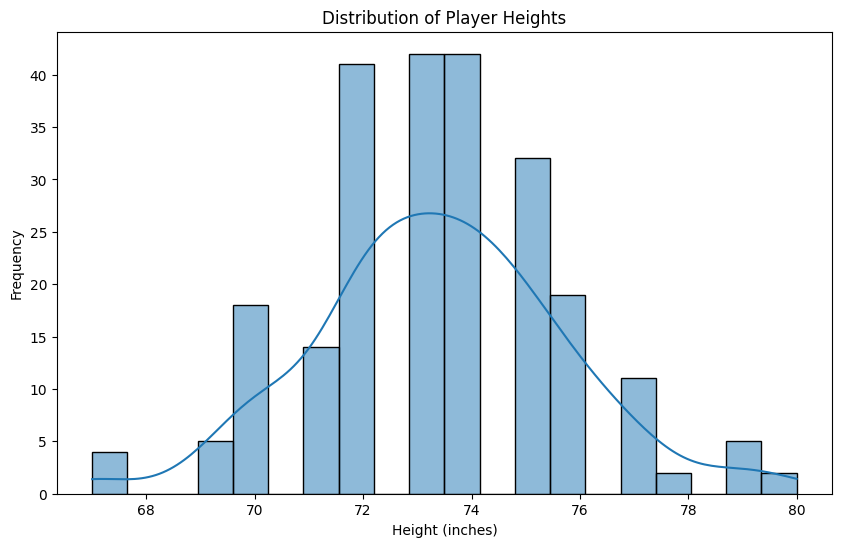

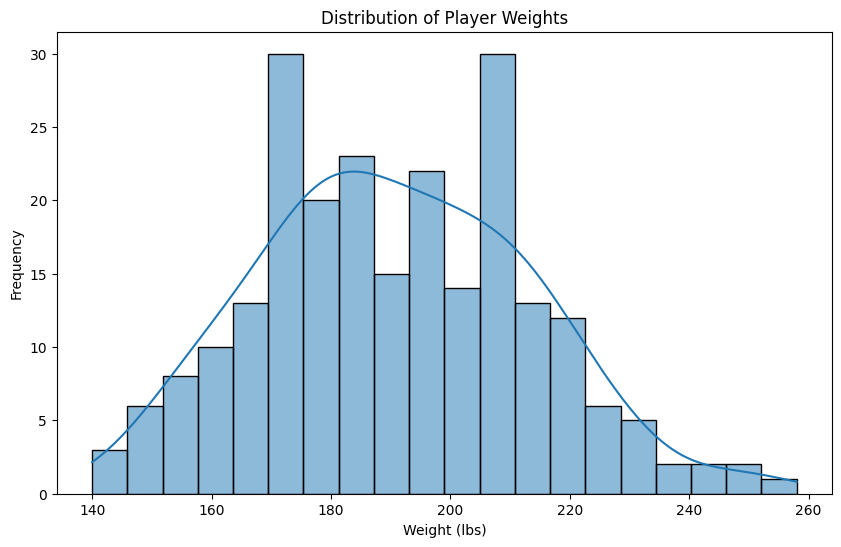

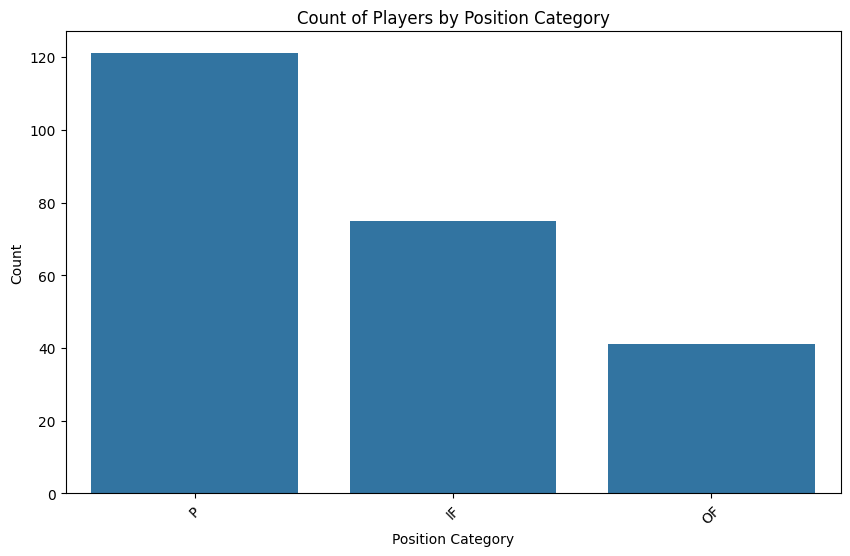

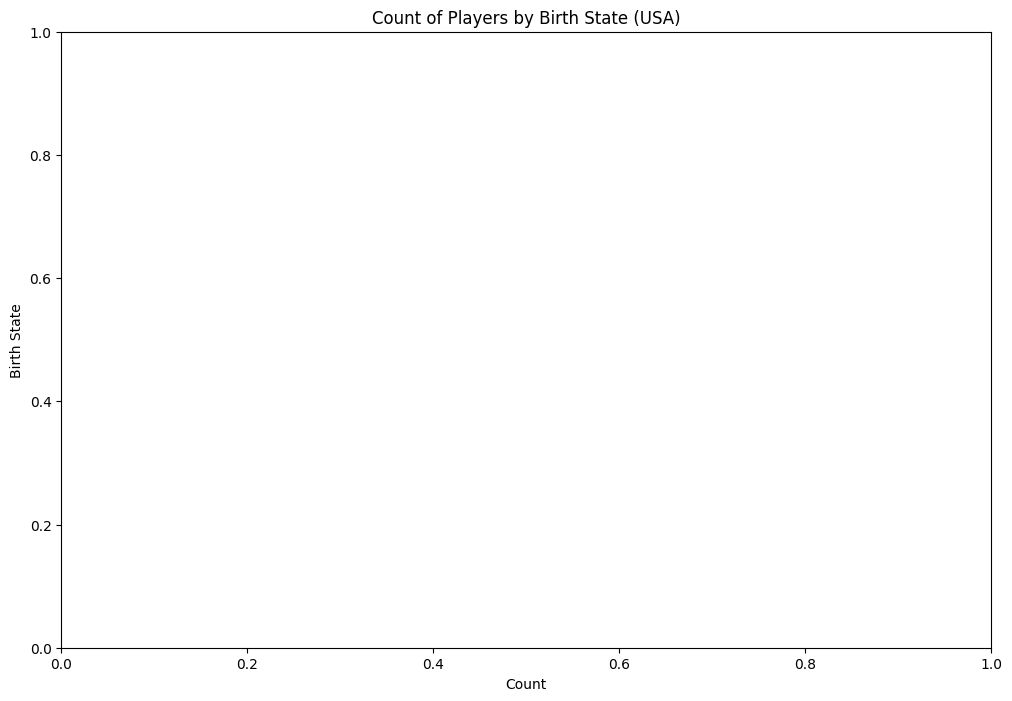

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Load the cleaned data
file_path = os.getenv('CLEANED_DATA_PATH')
if file_path is None:
    raise ValueError("CLEANED_DATA_PATH environment variable not set.")

cleaned_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
cleaned_data.head()

# Calculate value counts for birth states (USA only)
usa_players = cleaned_data[cleaned_data['BirthCountry'] == 'USA']
birth_state_counts = usa_players['BirthState'].value_counts()
print("Value counts for birth states (USA only):")
print(birth_state_counts)

# Calculate the average height and weight of players
average_height = cleaned_data['Height'].mean()
average_weight = cleaned_data['Weight'].mean()
print(f"Average height: {average_height:.2f} inches")
print(f"Average weight: {average_weight:.2f} lbs")

# Plot the distribution of player heights
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Height'], bins=20, kde=True)
plt.title('Distribution of Player Heights')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of player weights
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Weight'], bins=20, kde=True)
plt.title('Distribution of Player Weights')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()

# Plot the count of players by position category
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='PositionCategory', order=cleaned_data['PositionCategory'].value_counts().index)
plt.title('Count of Players by Position Category')
plt.xlabel('Position Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the count of players by birth state (USA only)
plt.figure(figsize=(12, 8))
sns.countplot(data=usa_players, y='BirthState', order=usa_players['BirthState'].value_counts().index)
plt.title('Count of Players by Birth State (USA)')
plt.xlabel('Count')
plt.ylabel('Birth State')
plt.show()

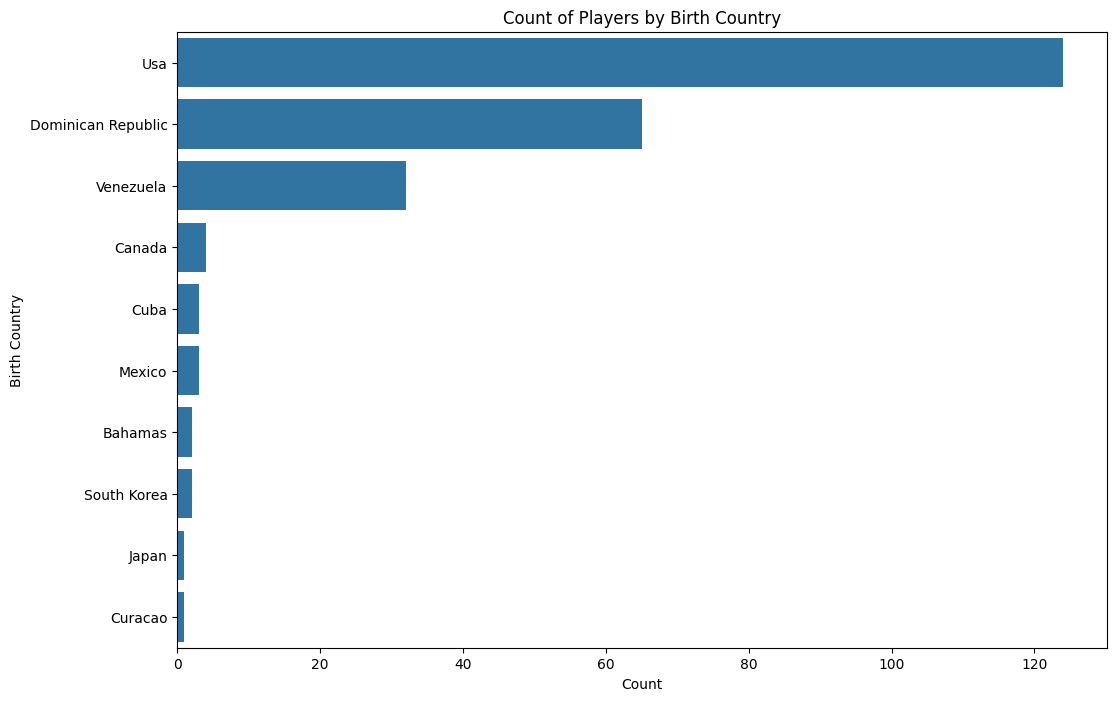

In [39]:
# Example visualization: Count of players by birth country
plt.figure(figsize=(12, 8))
sns.countplot(data=cleaned_data, y='BirthCountry', order=cleaned_data['BirthCountry'].value_counts().index)
plt.title('Count of Players by Birth Country')
plt.xlabel('Count')
plt.ylabel('Birth Country')
plt.show()

In [40]:
cleaned_data['BirthCountry'].value_counts()

Usa                   124
Dominican Republic     65
Venezuela              32
Canada                  4
Cuba                    3
Mexico                  3
Bahamas                 2
South Korea             2
Japan                   1
Curacao                 1
Name: BirthCountry, dtype: int64

In [41]:
marlins_file_path = os.getenv('RAW_DATA_PATH')
all_players_file_path = os.getenv('ALL_PLAYERS_CSV_PATH')

marlins_data = pd.read_csv(marlins_file_path)
all_players_data = pd.read_csv(all_players_file_path)
all_players_data['BirthCountry'].value_counts()

Usa                    3661
Dominican Republic     1247
Venezuela               953
Cuba                    115
Mexico                   88
Canada                   86
Puerto Rico              78
Colombia                 57
Panama                   50
Nicaragua                21
Japan                    21
Bahamas                  18
Curacao                  17
Taiwan                   16
South Korea              15
Aruba                    12
Australia                12
Netherlands               6
Italy                     4
Germany                   4
New Zealand               3
Brazil                    3
United Kingdom            3
Haiti                     3
U.S. Virgin Islands       2
Uganda                    2
Spain                     2
South Africa              2
China                     1
Slovakia                  1
Virgin Islands            1
Portugal                  1
Peru                      1
Guam                      1
France                    1
Iceland             

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Load the data
marlins_file_path = os.getenv('RAW_DATA_PATH')
all_players_file_path = os.getenv('ALL_PLAYERS_CSV_PATH')

marlins_data = pd.read_csv(marlins_file_path)
all_players_data = pd.read_csv(all_players_file_path)

# Filter data to include only players born in the USA
marlins_usa_players = marlins_data[marlins_data['BirthCountry'] == 'USA'].copy()
all_players_usa = all_players_data[all_players_data['BirthCountry'] == 'USA'].copy()

# Perform value counts of birth states to identify all unique values
marlins_state_counts_raw = marlins_usa_players['BirthState'].value_counts()
all_players_state_counts_raw = all_players_usa['BirthState'].value_counts()

# Print the raw value counts of birth states
print("Raw Marlins Birth State Counts:")
print(marlins_state_counts_raw)
print("\nRaw All Players Birth State Counts:")
print(all_players_state_counts_raw)

# Dictionary to map full state names to abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

# Standardize birth state names
marlins_usa_players.loc[:, 'BirthState'] = marlins_usa_players['BirthState'].replace(state_abbreviations)
all_players_usa.loc[:, 'BirthState'] = all_players_usa['BirthState'].replace(state_abbreviations)

# Further clean the data to ensure all state names are in abbreviation form
marlins_usa_players.loc[:, 'BirthState'] = marlins_usa_players['BirthState'].str.upper()
all_players_usa.loc[:, 'BirthState'] = all_players_usa['BirthState'].str.upper()

# Perform value counts again after standardization
marlins_state_counts = marlins_usa_players['BirthState'].value_counts()
all_players_state_counts = all_players_usa['BirthState'].value_counts()

# Combine the data into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'MLB Birth State Counts': all_players_state_counts,
    'Marlins Birth State Counts': marlins_state_counts
}).fillna(0)

# Calculate the percentage of Marlins players from each state
comparison_df['Marlins Percentage'] = (comparison_df['Marlins Birth State Counts'] / marlins_state_counts.sum()) * 100

# Sort the DataFrame by MLB Birth State Counts
comparison_df = comparison_df.sort_values(by='MLB Birth State Counts', ascending=False)

# Print the entire comparison DataFrame
pd.set_option('display.max_rows', None)  # Display all rows
print(comparison_df)

# Save the comparison DataFrame to a CSV file for further inspection
comparison_df.to_csv('birth_state_comparison.csv', index=True)

# Perform value counts for high school and college players if relevant columns exist
if 'DraftedOutOf' in marlins_data.columns and 'DraftedOutOf' in all_players_data.columns:
    marlins_usa_players['DraftedOutOf'] = marlins_usa_players['DraftedOutOf'].str.lower()
    all_players_usa['DraftedOutOf'] = all_players_usa['DraftedOutOf'].str.lower()
    
    marlins_drafted_counts = marlins_usa_players['DraftedOutOf'].value_counts()
    all_players_drafted_counts = all_players_usa['DraftedOutOf'].value_counts()
    
    # Print the value counts for high school and college players
    print("\nMarlins Drafted Out Of Counts:")
    print(marlins_drafted_counts)
    print("\nAll Players Drafted Out Of Counts:")
    print(all_players_drafted_counts)
    
    # Combine the data into a single DataFrame for comparison
    drafted_comparison_df = pd.DataFrame({
        'MLB Drafted Out Of Counts': all_players_drafted_counts,
        'Marlins Drafted Out Of Counts': marlins_drafted_counts
    }).fillna(0)
    
    # Calculate the percentage of Marlins players drafted out of each category
    drafted_comparison_df['Marlins Percentage'] = (drafted_comparison_df['Marlins Drafted Out Of Counts'] / marlins_drafted_counts.sum()) * 100
    
    # Sort the DataFrame by MLB Drafted Out Of Counts
    drafted_comparison_df = drafted_comparison_df.sort_values(by='MLB Drafted Out Of Counts', ascending=False)
    
    # Print the entire drafted comparison DataFrame
    print(drafted_comparison_df)
    
    # Save the drafted comparison DataFrame to a CSV file for further inspection
    drafted_comparison_df.to_csv('drafted_comparison.csv', index=True)
else:
    print("\nRelevant columns for drafted out of high school or college not found.")

Raw Marlins Birth State Counts:
CA                21
TX                 9
FL                 8
MN                 6
AL                 5
NY                 5
NJ                 5
CT                 4
IL                 4
PA                 4
WA                 3
NC                 3
OR                 3
MS                 3
MO                 3
OH                 3
GA                 2
SC                 2
OK                 2
VA                 2
MA                 2
NV                 2
CO                 2
IA                 2
KS                 1
Fl                 1
KY                 1
NM                 1
ID                 1
ME                 1
WY                 1
NH                 1
TN                 1
MI                 1
UT                 1
AZ                 1
NE                 1
HI                 1
D.C.               1
IN                 1
MT                 1
North Carolina     1
Name: BirthState, dtype: int64

Raw All Players Birth State Counts:
Series([], Name: B

In [43]:
# Perform value counts for high school and college players if relevant columns exist
if 'DraftedOutOf' in marlins_data.columns and 'DraftedOutOf' in all_players_data.columns:
    marlins_usa_players['DraftedOutOf'] = marlins_usa_players['DraftedOutOf'].str.lower()
    all_players_usa['DraftedOutOf'] = all_players_usa['DraftedOutOf'].str.lower()
    
    marlins_drafted_counts = marlins_usa_players['DraftedOutOf'].value_counts()
    all_players_drafted_counts = all_players_usa['DraftedOutOf'].value_counts()
    
    # Print the value counts for high school and college players
    print("\nMarlins Drafted Out Of Counts:")
    print(marlins_drafted_counts)
    print("\nAll Players Drafted Out Of Counts:")
    print(all_players_drafted_counts)
    
    # Combine the data into a single DataFrame for comparison
    drafted_comparison_df = pd.DataFrame({
        'MLB Drafted Out Of Counts': all_players_drafted_counts,
        'Marlins Drafted Out Of Counts': marlins_drafted_counts
    }).fillna(0)
    
    # Calculate the percentage of Marlins players drafted out of each category
    drafted_comparison_df['Marlins Percentage'] = (drafted_comparison_df['Marlins Drafted Out Of Counts'] / marlins_drafted_counts.sum()) * 100
    
    # Sort the DataFrame by MLB Drafted Out Of Counts
    drafted_comparison_df = drafted_comparison_df.sort_values(by='MLB Drafted Out Of Counts', ascending=False)
    
    # Print the entire drafted comparison DataFrame
    print(drafted_comparison_df)
    
    # Save the drafted comparison DataFrame to a CSV file for further inspection
    drafted_comparison_df.to_csv('drafted_comparison.csv', index=True)
else:
    print("\nRelevant columns for drafted out of high school or college not found.")


Relevant columns for drafted out of high school or college not found.


In [44]:
active_players = all_players_data[all_players_data['Status'] == 'Active']

In [45]:
active_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 6496
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PlayerID                             1202 non-null   int64  
 1   SportsDataID                         0 non-null      float64
 2   Status                               1202 non-null   object 
 3   TeamID                               1202 non-null   int64  
 4   Team                                 1202 non-null   object 
 5   Jersey                               1202 non-null   float64
 6   PositionCategory                     1202 non-null   object 
 7   Position                             1202 non-null   object 
 8   MLBAMID                              1202 non-null   float64
 9   FirstName                            1202 non-null   object 
 10  LastName                             1202 non-null   object 
 11  BatHand                       

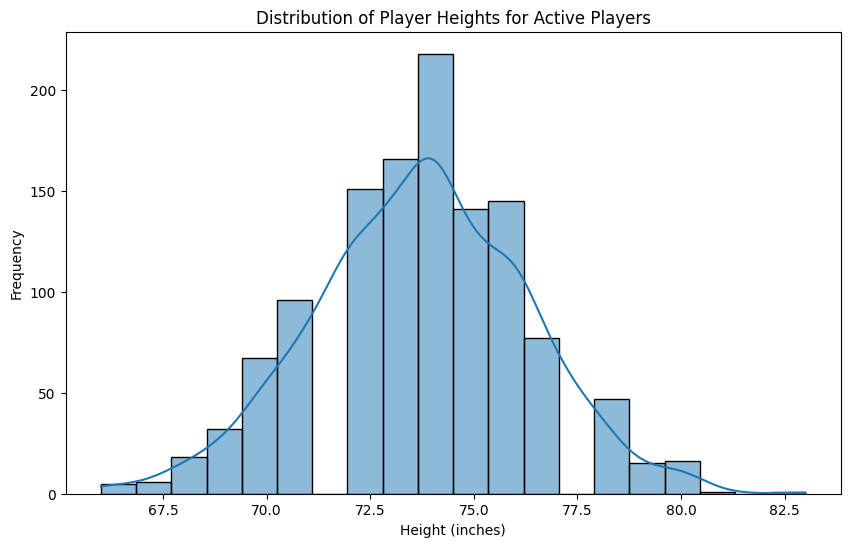

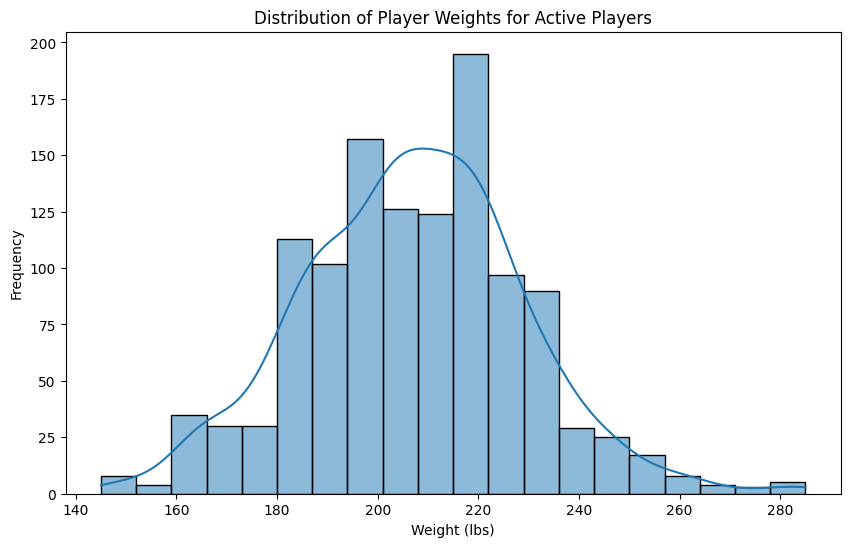

In [46]:
active_players = all_players_data[all_players_data['Status'] == 'Active']
# Example visualization: Distribution of player heights for active Marlins players
plt.figure(figsize=(10, 6))
sns.histplot(active_players['Height'], bins=20, kde=True)
plt.title('Distribution of Player Heights for Active Players')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

# Example visualization: Distribution of player weights for active Marlins players
plt.figure(figsize=(10, 6))
sns.histplot(active_players['Weight'], bins=20, kde=True)
plt.title('Distribution of Player Weights for Active Players')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()


     PlayerID  SportsDataID  Status  TeamID Team  Jersey PositionCategory  \
207  10005191           NaN  Active      22  MIA     7.0               OF   
243  10005448           NaN  Active      22  MIA    22.0                P   
330  10006112           NaN  Active      22  MIA     3.0               OF   
423  10006852           NaN  Active      22  MIA    38.0                P   
503  10007106           NaN  Active      22  MIA    40.0                P   

    Position   MLBAMID FirstName  ...        YahooName GlobalTeamID  \
207       RF  660821.0     Jesús  ...    Jesús Sánchez     10000022   
243       SP  645261.0     Sandy  ...  Sandy Alcantara     10000022   
330       CF  656537.0     Derek  ...       Derek Hill     10000022   
423       RP  622786.0     Jesus  ...     Jesús Tinoco     10000022   
503       SP  615698.0       Cal  ...    Cal Quantrill     10000022   

    FantasyDraftName  FantasyDraftPlayerID  Experience UsaTodayPlayerID  \
207     Matthew Boyd              6

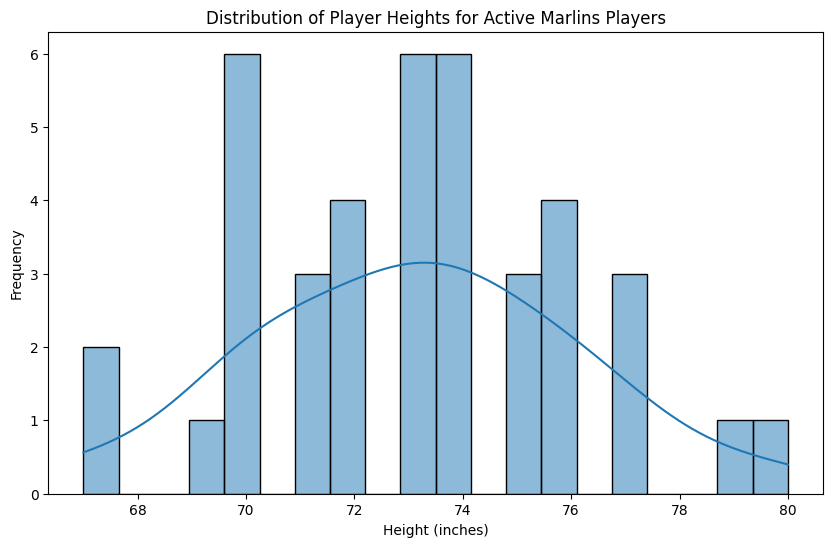

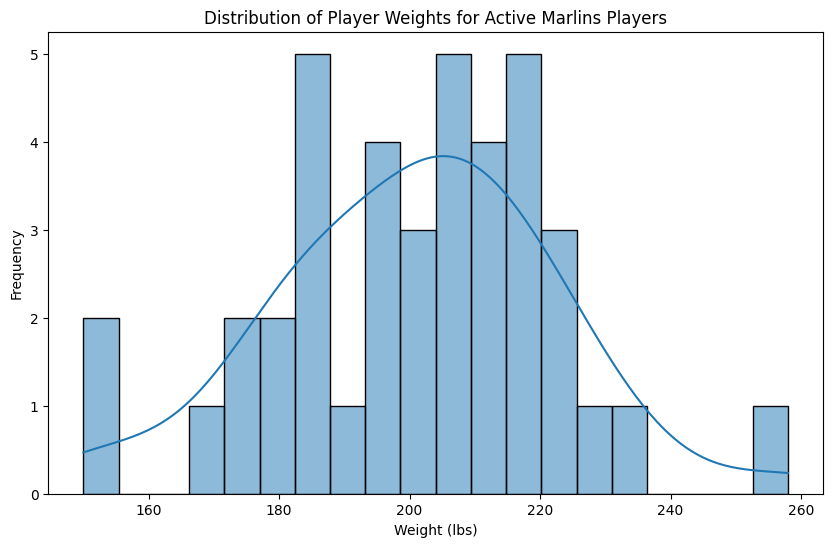

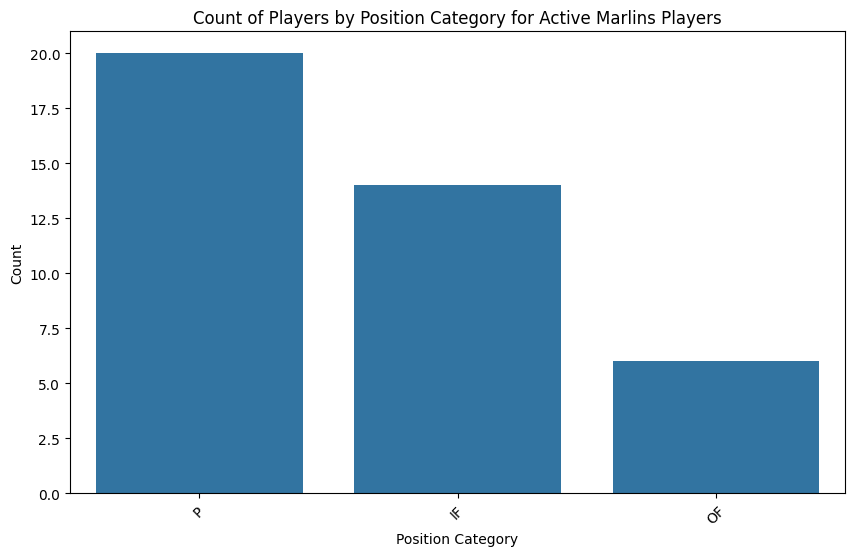

In [47]:
# Filter Marlins players from active players
marlins_active_players = active_players[active_players['Team'] == 'MIA']

# Display the first few rows of the filtered DataFrame
print(marlins_active_players.head())

# Example visualization: Distribution of player heights for active Marlins players
plt.figure(figsize=(10, 6))
sns.histplot(marlins_active_players['Height'], bins=20, kde=True)
plt.title('Distribution of Player Heights for Active Marlins Players')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

# Example visualization: Distribution of player weights for active Marlins players
plt.figure(figsize=(10, 6))
sns.histplot(marlins_active_players['Weight'], bins=20, kde=True)
plt.title('Distribution of Player Weights for Active Marlins Players')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()

# Example visualization: Count of players by position category for active Marlins players
plt.figure(figsize=(10, 6))
sns.countplot(data=marlins_active_players, x='PositionCategory', order=marlins_active_players['PositionCategory'].value_counts().index)
plt.title('Count of Players by Position Category for Active Marlins Players')
plt.xlabel('Position Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [48]:
print(all_players_data['BirthCountry'].value_counts())

Usa                    3661
Dominican Republic     1247
Venezuela               953
Cuba                    115
Mexico                   88
Canada                   86
Puerto Rico              78
Colombia                 57
Panama                   50
Nicaragua                21
Japan                    21
Bahamas                  18
Curacao                  17
Taiwan                   16
South Korea              15
Aruba                    12
Australia                12
Netherlands               6
Italy                     4
Germany                   4
New Zealand               3
Brazil                    3
United Kingdom            3
Haiti                     3
U.S. Virgin Islands       2
Uganda                    2
Spain                     2
South Africa              2
China                     1
Slovakia                  1
Virgin Islands            1
Portugal                  1
Peru                      1
Guam                      1
France                    1
Iceland             

In [49]:
players_file_path = os.getenv('ALL_PLAYERS_CSV_PATH')
players_data = pd.read_csv(players_file_path)
players_data.head()


,PlayerID,SportsDataID,Status,TeamID,Team,Jersey,PositionCategory,Position,MLBAMID,FirstName,...,YahooName,GlobalTeamID,FantasyDraftName,FantasyDraftPlayerID,Experience,UsaTodayPlayerID,UsaTodayHeadshotUrl,UsaTodayHeadshotNoBackgroundUrl,UsaTodayHeadshotUpdated,UsaTodayHeadshotNoBackgroundUpdated
0,10000020,NaN,Active,15,SF,38.0,P,SP,592662.0,Robbie,...,Robbie Ray,10000015,Robbie Ray,549085.0,11.0,8336513.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2024-03-26T12:06:21,2024-03-26T12:06:44
1,10000029,NaN,Non-Roster Invitee,28,TEX,38.0,IF,SS,605113.0,Nick,...,Nick Ahmed,10000028,Nick Ahmed,577767.0,11.0,8345333.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2023-04-05T16:09:38,2023-04-05T15:59:54
2,10000030,NaN,Non-Roster Invitee,16,CHW,28.0,IF,2B,592273.0,Brandon,...,Brandon Drury,10000016,Brandon Drury,549169.0,10.0,8311875.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2024-03-27T09:47:08,2024-03-27T09:47:13
3,10000031,NaN,Active,29,NYY,48.0,IF,1B,502671.0,Paul,...,Paul Goldschmidt,10000029,Paul Goldschmidt,501577.0,14.0,8271103.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2024-03-26T11:56:42,2024-03-26T11:56:49
4,10000033,NaN,Non-Roster Invitee,15,SF,33.0,IF,3B,571875.0,Jake,...,Jake Lamb,10000015,Jake Lamb,503242.0,10.0,8336680.0,http://cdn.usatsimg.com/api/download/?imageID=...,http://cdn.usatsimg.com/api/download/?imageID=...,2024-03-27T12:44:43,2024-03-27T12:44:50


In [50]:
players_data['Experience'].value_counts()

0.0     4326
1.0      801
2.0      362
3.0      302
4.0      156
5.0      119
6.0      105
7.0       86
8.0       78
9.0       61
10.0      38
11.0      27
12.0      23
13.0       9
14.0       8
15.0       7
16.0       3
17.0       3
19.0       1
Name: Experience, dtype: int64

C:\Users\Mitch\AppData\Local\Temp\ipykernel_22428\2165476668.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_players['Age'] = active_players['BirthDate'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)) if pd.notnull(x) else None)


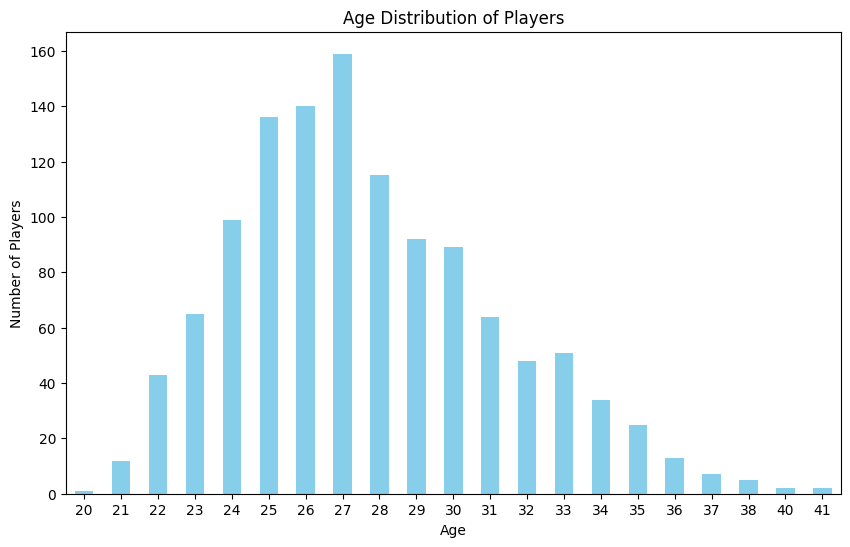

In [51]:
from datetime import datetime

# Ensure the BirthDate column is in datetime format
players_data['BirthDate'] = pd.to_datetime(players_data['BirthDate'], errors='coerce')
# Filter to include only active players
active_players = players_data[players_data['Status'] == 'Active']

# Calculate the age of each player
current_date = datetime.now()
active_players['Age'] = active_players['BirthDate'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)) if pd.notnull(x) else None)

# Get the value counts of the ages
active_age_counts = active_players['Age'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
active_age_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Age Distribution of Players')
plt.xticks(rotation=0)
plt.show()

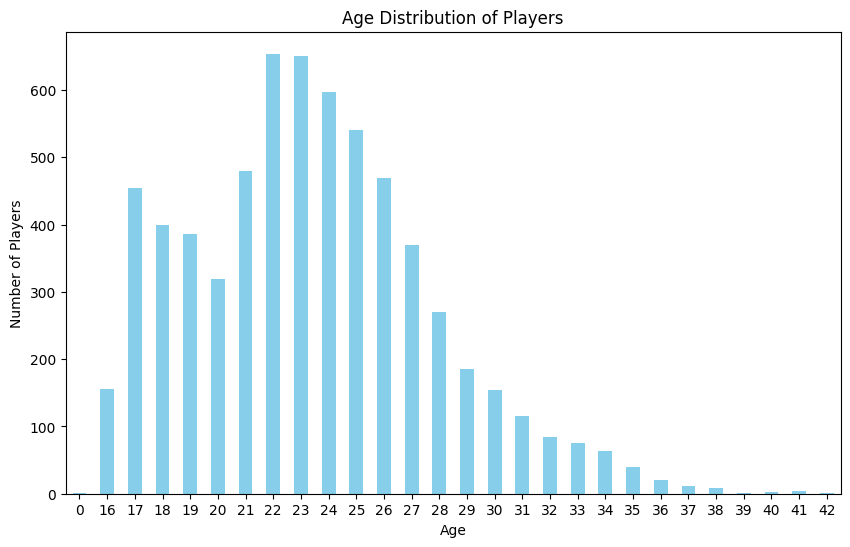

In [52]:
# Ensure the BirthDate column is in datetime format
players_data['BirthDate'] = pd.to_datetime(players_data['BirthDate'], errors='coerce')

# Calculate the age of each player
current_date = datetime.now()
players_data['Age'] = players_data['BirthDate'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)) if pd.notnull(x) else None)

# Get the value counts of the ages
age_counts = players_data['Age'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Age Distribution of Players')
plt.xticks(rotation=0)
plt.show()

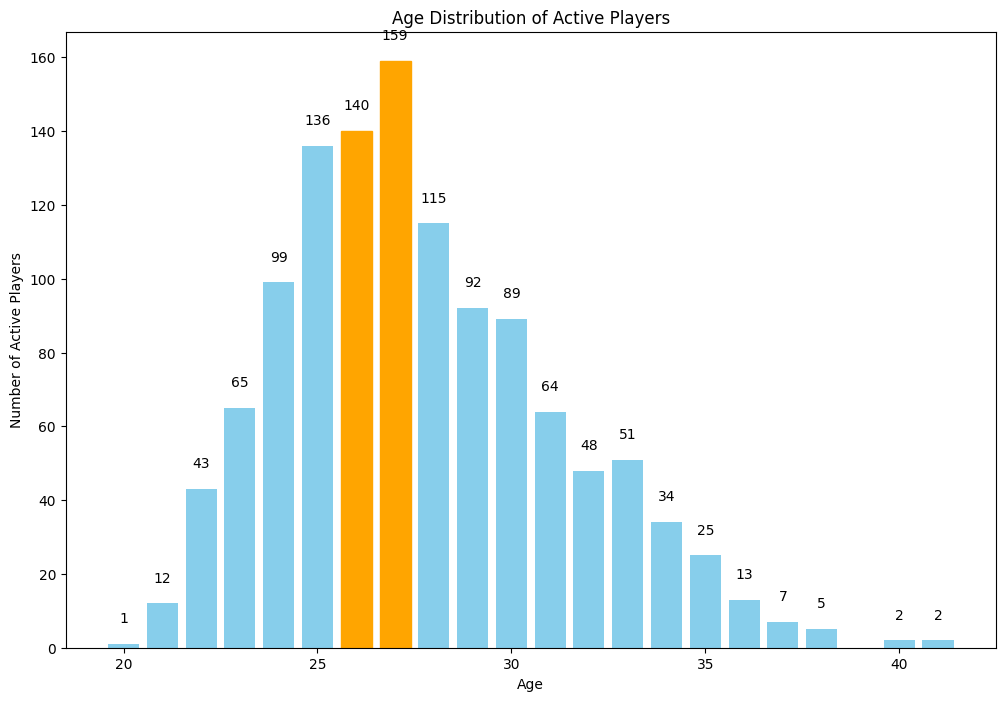

Series([], Name: BirthState, dtype: int64)


In [53]:
# Ensure the BirthDate column is in datetime format
players_data['BirthDate'] = pd.to_datetime(players_data['BirthDate'], errors='coerce')

# Filter to include only active players
active_players = players_data[players_data['Status'] == 'Active'].copy()

# Calculate the age of each active player
current_date = datetime.now()
active_players.loc[:, 'Age'] = active_players['BirthDate'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)) if pd.notnull(x) else None)

# Get the value counts of the ages for active players
active_age_counts = active_players['Age'].value_counts().sort_index()

# Plot the bar chart for active players
plt.figure(figsize=(12, 8))
bars = plt.bar(active_age_counts.index, active_age_counts.values, color='skyblue')

# Highlight the peak age range (25-27)
for bar in bars:
    if 25 <= bar.get_x() <= 27:
        bar.set_color('orange')

# Add annotations for the peak age range
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

plt.xlabel('Age')
plt.ylabel('Number of Active Players')
plt.title('Age Distribution of Active Players')
plt.xticks(rotation=0)
plt.show()

players_data_usa = players_data[players_data['BirthCountry'] == 'USA']
print(players_data_usa['BirthState'].value_counts())

In [54]:
# Ensure the BirthCountry, HighSchool, and College columns are in the correct format
active_players['BirthCountry'] = active_players['BirthCountry'].str.strip().str.title()
active_players['HighSchool'] = active_players['HighSchool'].str.strip()
active_players['College'] = active_players['College'].str.strip()

# Classify players
def classify_player(row):
    if pd.notnull(row['College']) and row['College'].strip() != '' and row['College'].strip().lower() != 'none':
        return 'College'
    elif pd.notnull(row['HighSchool']) and row['HighSchool'].strip() != '' and (pd.isnull(row['College']) or row['College'].strip().lower() == 'none'):
        return 'High School'
    else:
        return 'Neither'

active_players['Origin'] = active_players.apply(classify_player, axis=1)

# Count the number of players from each category
origin_counts = active_players['Origin'].value_counts()

# Print the counts
print(origin_counts)

# Determine the number of international players
international_players = active_players[active_players['BirthCountry'] != 'Usa']
international_counts = international_players['Origin'].value_counts()

# Print the counts of international players
print(international_counts)

# Breakdown of players from the Dominican Republic
dominican_players = active_players[active_players['BirthCountry'] == 'Dominican Republic']
dominican_counts = dominican_players['Origin'].value_counts()

# Print the counts of Dominican players
print(dominican_counts)

College        647
High School    555
Name: Origin, dtype: int64
High School    327
College         33
Name: Origin, dtype: int64
High School    129
College          4
Name: Origin, dtype: int64


In [55]:
players_data_usa = players_data[players_data['BirthCountry'] == 'USA']
print(players_data_usa['BirthState'].value_counts())

Series([], Name: BirthState, dtype: int64)


In [56]:
players_data_usa = players_data[players_data['BirthCountry'] == 'USA']
print(players_data_usa['BirthState'])

Series([], Name: BirthState, dtype: object)


In [57]:

# Ensure the BirthCountry column is in the correct format
players_data['BirthCountry'] = players_data['BirthCountry'].str.strip().str.title()

# Check unique values in BirthCountry
print("Unique values in BirthCountry:", players_data['BirthCountry'].unique())

# Filter for players born in the USA
players_data_usa = players_data[players_data['BirthCountry'] == 'Usa']

# Print the BirthState column for USA players
print(players_data_usa['BirthState'].count())
# Print the count of USA players
print("Total USA players:", players_data_usa['BirthState'].count())

# Count USA players with a college listed
college_draft_count = players_data_usa[players_data_usa['College'].str.strip().str.lower() != 'none']['College'].count()
print("USA players with a college listed (College Draft):", college_draft_count)

# Count USA players without a college listed
high_school_draft_count = players_data_usa[players_data_usa['College'].str.strip().str.lower() == 'none']['College'].count()
print("USA players without a college listed (High School Draft):", high_school_draft_count)

# Calculate percentages
total_usa_players = players_data_usa['BirthState'].count()
college_draft_percentage = (college_draft_count / total_usa_players) * 100
high_school_draft_percentage = (high_school_draft_count / total_usa_players) * 100

print(f"Percentage of USA players with a college listed (College Draft): {college_draft_percentage:.2f}%")
print(f"Percentage of USA players without a college listed (High School Draft): {high_school_draft_percentage:.2f}%")

Unique values in BirthCountry: ['Usa' 'Panama' 'Venezuela' 'Puerto Rico' 'Aruba' 'Cuba'
 'Dominican Republic' 'Curacao' 'Colombia' 'Germany' 'Nicaragua' 'Japan'
 'Australia' 'Canada' 'South Korea' 'Honduras' 'Mexico' 'Guam' 'Peru'
 'Bahamas' 'Brazil' 'South Africa' 'Taiwan' 'United Kingdom' 'Portugal'
 'Netherlands' 'Slovakia' 'China' 'New Zealand' 'Spain' 'Virgin Islands'
 'Haiti' 'Italy' 'Uganda' 'France' 'Iceland' 'Russia'
 'Antigua And Barbuda' 'U.S. Virgin Islands' '2001' 'Saint Martin'
 'South Sudan']
3661
Total USA players: 3661
USA players with a college listed (College Draft): 2929
USA players without a college listed (High School Draft): 732
Percentage of USA players with a college listed (College Draft): 80.01%
Percentage of USA players without a college listed (High School Draft): 19.99%


In [58]:
player_stats_file_path = os.getenv('PLAYER_STATS_CSV_PATH')
player_stats = pd.read_csv(player_stats_file_path)
player_stats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Columns: 117 entries, StatID to FantasyPointsPitching
dtypes: bool(1), float64(103), int64(8), object(5)
memory usage: 1.7+ MB


In [59]:
player_name = "Brendan Donovan"
donnie_baseball = player_stats[player_stats['Name'] == 'Brendan Donovan']

In [60]:
donnie_baseball.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1146 to 1146
Columns: 117 entries, StatID to FantasyPointsPitching
dtypes: bool(1), float64(103), int64(8), object(5)
memory usage: 937.0+ bytes


In [61]:
# Inspect the first few rows of the DataFrame
print(player_stats.head())

# Get summary statistics
print(player_stats.describe())

# Check for missing values
print(player_stats.isnull().sum())

    StatID  TeamID  PlayerID  SeasonType  Season            Name Team  \
0  6618420      28  10000001           1    2024  Chase Anderson  TEX   
1  6599217      28  10000005           1    2024   Andrew Chafin  TEX   
2  6609914      35  10000007           1    2024  Patrick Corbin  WSH   
3  6570956       1  10000014           1    2024   Daniel Hudson  LAD   
4  6673724      15  10000020           1    2024      Robbie Ray   SF   

  Position PositionCategory  Started  ...  PitchingQualityStarts  \
0       RP                P        1  ...                    0.0   
1       RP                P        0  ...                    0.0   
2       SP                P       32  ...                   13.1   
3       RP                P        0  ...                    0.0   
4       SP                P        7  ...                    4.2   

   PitchingInningStarted  LeftOnBase  PitchingHolds PitchingBlownSaves  \
0                    NaN         0.0            0.0                0.0   
1   

In [62]:
# Calculate the average fantasy points for all players
average_fantasy_points = player_stats['FantasyPoints'].mean()
print(f"Average Fantasy Points: {average_fantasy_points}")

Average Fantasy Points: 127.39709609292501


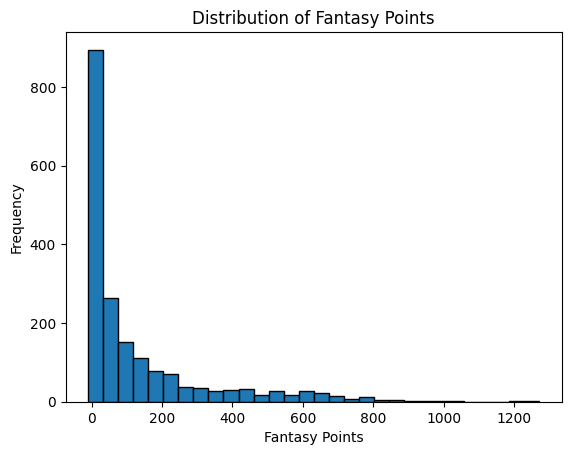

In [63]:
import matplotlib.pyplot as plt

# Plot the distribution of Fantasy Points
plt.hist(player_stats['FantasyPoints'].dropna(), bins=30, edgecolor='k')
plt.title('Distribution of Fantasy Points')
plt.xlabel('Fantasy Points')
plt.ylabel('Frequency')
plt.show()

In [72]:
import pandas as pd

# Load the usa_players
csv_file_path = 'C:/Users/Mitch/Desktop/data-engineering-project/data/processed/cleaned_all_active_players.csv'

data = pd.read_csv(csv_file_path, parse_dates=['BirthDate'])

usa_players = data[data['BirthCountry'] == 'Usa']
# Player Demographics
print("Player Demographics:")
print(usa_players['BirthCountry'].value_counts())
print(usa_players['BirthState'].value_counts())
print(usa_players['BirthCity'].value_counts())
print(usa_players['BirthDate'].dt.year.value_counts())

# Player Performance
print("\nPlayer Performance:")
print(usa_players['Salary'].describe())
print(usa_players['Position'].value_counts())
print(usa_players['PositionCategory'].value_counts())
print(usa_players['Experience'].describe())

# Injury Analysis
print("\nInjury Analysis:")
print(usa_players['InjuryStatus'].value_counts())
print(usa_players['InjuryBodyPart'].value_counts())
print(usa_players['InjuryStartDate'].dropna().describe())

# Team Composition
print("\nTeam Composition:")
print(usa_players['Team'].value_counts())
print(usa_players['BatHand'].value_counts())
print(usa_players['ThrowHand'].value_counts())

# Player Identification
print("\nPlayer Identification:")
print(usa_players['MLBAMID'].nunique())
print(usa_players['SportRadarPlayerID'].nunique())

Player Demographics:
Usa    3661
Name: BirthCountry, dtype: int64
CA             631
FL             333
TX             328
GA             193
IL             150
NC             149
NY             142
PA             135
VA             105
NJ              90
OH              82
AZ              79
AL              78
TN              75
IN              68
WA              68
MO              63
OK              61
MI              61
LA              57
CO              56
MA              53
SC              51
MN              48
MS              41
MD              40
WI              39
IA              37
KS              35
KY              35
OR              33
NV              31
CT              31
UT              26
AR              23
HI              23
NE              18
RI              15
NM              12
NH              12
DE              11
WV               9
ID               9
ND               6
MT               4
WY               3
SD               3
ME               3
D.C.             2
VT 

Player Demographics:
Usa                    3661
Dominican Republic     1247
Venezuela               953
Cuba                    115
Mexico                   88
Canada                   86
Puerto Rico              78
Colombia                 57
Panama                   50
Nicaragua                21
Japan                    21
Bahamas                  18
Curacao                  17
Taiwan                   16
South Korea              15
Aruba                    12
Australia                12
Netherlands               6
Italy                     4
Germany                   4
New Zealand               3
Brazil                    3
United Kingdom            3
Haiti                     3
U.S. Virgin Islands       2
Uganda                    2
Spain                     2
South Africa              2
China                     1
Slovakia                  1
Virgin Islands            1
Portugal                  1
Peru                      1
Guam                      1
France                    1

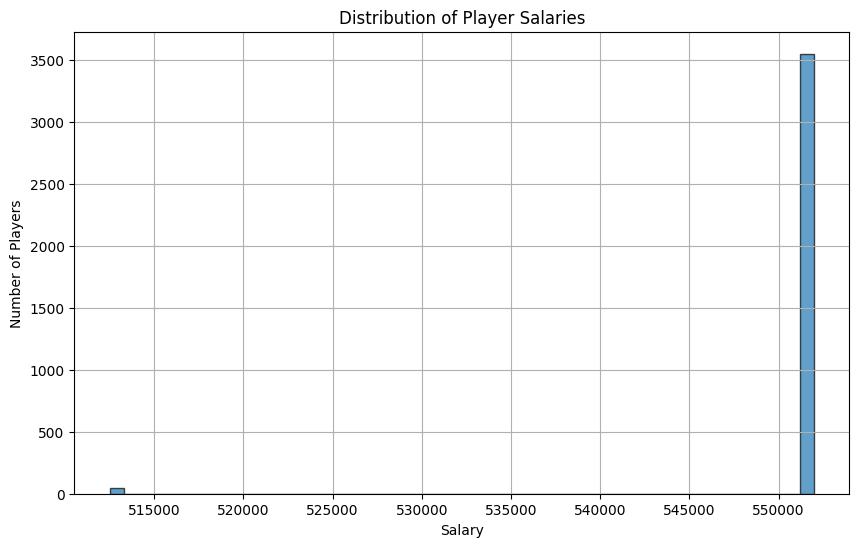

In [ ]:
import pandas as pd

# Load the data
csv_file_path = 'C:/Users/Mitch/Desktop/data-engineering-project/data/processed/cleaned_all_active_players.csv'

data = pd.read_csv(csv_file_path, parse_dates=['BirthDate'])

# Player Demographics
print("Player Demographics:")
print(data['BirthCountry'].value_counts())
print(data['BirthState'].value_counts())
print(data['BirthCity'].value_counts())
print(data['BirthDate'].dt.year.value_counts())

# Player Performance
print("\nPlayer Performance:")
print(data['Salary'].describe())
print(data['Position'].value_counts())
print(data['PositionCategory'].value_counts())
print(data['Experience'].describe())

# Injury Analysis
print("\nInjury Analysis:")
print(data['InjuryStatus'].value_counts())
print(data['InjuryBodyPart'].value_counts())
print(data['InjuryStartDate'].dropna().describe())

# Team Composition
print("\nTeam Composition:")
print(data['Team'].value_counts())
print(data['BatHand'].value_counts())
print(data['ThrowHand'].value_counts())

# Player Identification
print("\nPlayer Identification:")
print(data['MLBAMID'].nunique())
print(data['SportRadarPlayerID'].nunique())



In [75]:
player_stats.head()

,StatID,TeamID,PlayerID,SeasonType,Season,Name,Team,Position,PositionCategory,Started,...,PitchingQualityStarts,PitchingInningStarted,LeftOnBase,PitchingHolds,PitchingBlownSaves,SubstituteBattingOrder,SubstituteBattingOrderSequence,FantasyPointsFantasyDraft,FantasyPointsBatting,FantasyPointsPitching
0,6618420,28,10000001,1,2024,Chase Anderson,TEX,RP,P,1,...,0.0,NaN,0.0,0.0,0.0,NaN,NaN,141.1,0.0,29.33
1,6599217,28,10000005,1,2024,Andrew Chafin,TEX,RP,P,0,...,0.0,NaN,0.0,18.9,6.3,NaN,NaN,273.3,0.0,52.33
2,6609914,35,10000007,1,2024,Patrick Corbin,WSH,SP,P,32,...,13.1,NaN,0.0,0.0,0.0,NaN,NaN,461.4,0.0,89.66
3,6570956,1,10000014,1,2024,Daniel Hudson,LAD,RP,P,0,...,0.0,NaN,0.0,24.7,10.2,NaN,NaN,304.9,0.0,86.00
4,6673724,15,10000020,1,2024,Robbie Ray,SF,SP,P,7,...,4.2,NaN,0.0,0.0,0.0,NaN,NaN,160.2,0.0,26.66


In [ ]:
print(player_stats['HomeRuns'].dtype)
# Identify rows with decimal values in the HomeRuns column
invalid_home_runs = player_stats[player_stats['HomeRuns'] % 1 != 0]
print("Invalid Home Runs Entries:")
print(invalid_home_runs)

# Remove rows with decimal values in the HomeRuns column
cleaned_player_stats = player_stats[player_stats['HomeRuns'] % 1 == 0]

# Convert HomeRuns column to integer type if necessary
cleaned_player_stats['HomeRuns'] = cleaned_player_stats['HomeRuns'].astype(int)

# Display the cleaned Home Runs list
print("Cleaned Home Runs List:")
print(cleaned_player_stats['HomeRuns'])

float64
Invalid Home Runs Entries:
       StatID  TeamID  PlayerID  SeasonType  Season  \
5     6599068      33  10000029           1    2024   
6     6599140      21  10000030           1    2024   
7     6599201      31  10000031           1    2024   
10    6653154      33  10000040           1    2024   
15    6599058       9  10000072           1    2024   
16    6570955       1  10000077           1    2024   
20    6570928      33  10000129           1    2024   
25    6609910      20  10000164           1    2024   
27    6570944       1  10000176           1    2024   
29    6599121      17  10000213           1    2024   
30    6599212      29  10000217           1    2024   
31    6599175      26  10000225           1    2024   
37    6599074      30  10000258           1    2024   
40    6599099      22  10000270           1    2024   
47    6600042      14  10000311           1    2024   
51    6599870       9  10000343           1    2024   
53    6600072      10  1000035

C:\Users\Mitch\AppData\Local\Temp\ipykernel_22428\958603822.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_player_stats['HomeRuns'] = cleaned_player_stats['HomeRuns'].astype(int)


In [84]:
player_stats['HomeRuns'] = player_stats['HomeRuns'].round().astype(int)

# Extract the Player Name and Home Runs columns
player_fantasy_batting = player_stats[['Name', 'FantasyPointsBatting']]

# Sort by HomeRuns in descending order and limit to top 20
player_fantasy_batting_top_20 = player_fantasy_batting.sort_values(by='FantasyPointsBatting', ascending=False).head(20)
# Display the cleaned data
print("Player Names and Fantasy Points Batting:")
print(player_fantasy_batting_top_20)

Player Names and Fantasy Points Batting:
                       Name  FantasyPointsBatting
880           Shohei Ohtani                 876.0
232             Aaron Judge                 820.0
1181         Bobby Witt Jr.                 723.0
495               Juan Soto                 708.0
53             José Ramírez                 695.0
1194       Gunnar Henderson                 666.0
1587        Elly De La Cruz                 665.0
1058           Jarren Duran                 637.0
189        Francisco Lindor                 629.0
682   Vladimir Guerrero Jr.                 615.0
237          Kyle Schwarber                 610.0
95            Marcell Ozuna                 610.0
316            Willy Adames                 600.0
1188         Corbin Carroll                 592.0
805            Brent Rooker                 584.0
612          Yordan Alvarez                 578.0
852       William Contreras                 565.0
485       Anthony Santander                 563.0
408      

In [ ]:
# Round the HomeRuns column to the nearest integer
player_stats['HomeRuns'] = player_stats['HomeRuns'].round().astype(int)

# Extract the Player Name and Home Runs columns
player_home_runs = player_stats[['Name', 'HomeRuns']]

# Sort by HomeRuns in descending order and limit to top 20
top_20_home_runs = player_home_runs.sort_values(by='HomeRuns', ascending=False).head(20)

# Display the top 20 players with the highest home runs
print("Top 20 Players by Home Runs:")
print(top_20_home_runs)